In [3]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_pickle('../data/processed/rumc.pkl')
df

% CD4+ T-Lymfocyten (CD3+CD4+)  \
patientprimarymrn study                                   
10000             st000                             NaN   
                  st001                             NaN   
10001             st000                             NaN   
10002             st000                             NaN   
10003             st000                             NaN   
...                                                 ...   
10723             st000                             NaN   
10724             st000                             NaN   
10725             st000                             NaN   
10726             st000                             NaN   
10727             st000                             NaN   

                         % CD8+ T-Lymfocyten (CD3+CD8+)  \
patientprimarymrn study                                   
10000             st000                             NaN   
                  st001                             NaN   
10001             st000                             NaN   
10002             st000                             NaN   
10003             st000                             NaN   
...                                                 ...   
10723             st000                             NaN   
10724             st000                             NaN   
10725             st000                             NaN   
10726             st000                             NaN   
10727             st000                             NaN   

                         % T-lymfocyten (CD3+)  (Pseudo) Pelger Huet  \
patientprimarymrn study                                                
10000             st000                    NaN                   NaN   
                  st001                    NaN                   NaN   
10001             st000                    NaN                   NaN   
10002             st000                    NaN                   NaN   
10003             st000                    NaN                   NaN   
...                                        ...                   ...   
10723             st000                    NaN                   NaN   
10724             st000                    NaN                   NaN   
10725             st000                    NaN                   NaN   
10726             st000                    NaN                   NaN   
10727             st000                    NaN                   NaN   

                         (pseudo) Pelger Huet  3-Methoxytyramine  \
patientprimarymrn study                                            
10000             st000                   NaN                NaN   
                  st001                   NaN                NaN   
10001             st000                   NaN                NaN   
10002             st000                   NaN                NaN   
10003             st000                   NaN                NaN   
...                                       ...                ...   
10723             st000                   NaN                NaN   
10724             st000                   NaN                NaN   
10725             st000                   NaN                NaN   
10726             st000                   NaN                NaN   
10727             st000                   NaN                NaN   

                         5-HIAA/MMOL KREAT (24uurs Urine)  \
patientprimarymrn study                                     
10000             st000                               NaN   
                  st001                               NaN   
10001             st000                               NaN   
10002             st000                               NaN   
10003             st000                               NaN   
...                                                   ...   
10723             st000                               NaN   
10724             st000                               NaN   
10725             st000                               NaN

In [13]:
(df[['pcr', 'diagnosis']].mean(axis=1).isna()).sum()

617

In [47]:
import re
df = df.rename(columns = lambda x:re.sub('[^-%A-Za-z0-9_/ ]+', '', x))
df.columns = df.columns.str.replace(' ', '_')

In [48]:
df_merged = df.copy()
df_merged.columns = df.columns.str.replace(r'\(.+?\)', '', regex=True).str.strip()

In [49]:
from pandas.api.types import is_numeric_dtype
def aggregate(x: pd.Series):
    if x.shape[1] == 1:
        return x.iloc[:, 0]
    if is_numeric_dtype(x.dtypes[0]):
        return x.mean(axis=1)
    result = x.apply(lambda y: next(z for z in y.values if not pd.isna(z)) if not y.isna().all() else np.nan, axis=1)
    if len(result.shape) == 2:
        print(x)
        print(result)
        x.apply(lambda y: print(next(z for z in y.values if not pd.isna(z)) if not y.isna().all() else np.nan), axis=1)
        error()
    return result
df = df_merged.groupby(df_merged.columns, axis=1).agg(aggregate)

In [50]:
input_features = df.columns[~df.columns.isin(['pcr', 'corads', 'part', 'diagnosis'])]
output_feature = 'corads'

In [51]:
df[df == 'nan'] = np.nan
for col in input_features:
    if not is_numeric_dtype(df[col]):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes.astype('category')

In [52]:
df_train = df[df.part == 'train']
df_val = df[df.part == 'val']
df_test = df[df.part == 'test']

In [53]:
df_train.select_dtypes(include='category')

,,AB0/RhD_bloedgroep,ANCA_fluorescentie,ANTI-NMDA_RECEPTOR,ASXL1_mutatie_exon_13_beenmerg,Abnormale_hemoglobines,Afnameconditie,Alarm_Hemocytometrie,Alg_bact_onderz,Algemene_kweek_BAL,Algemene_kweek_Bronchusspoeling,...,Yersinia_IgA,Yersinia_IgG,Zuurvaste_staven_Auramine,bacterien_urine,erytrocyten_Urine,jonge_lymfocyten,part,pcr,plasmacytoide_lymfocyten,sex
patientprimarymrn,study,,,,,,,,,,,,,,,,,,,,,
10002,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,train,NaN,-1,0
10006,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,-1,train,NaN,-1,1
10007,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,train,NaN,-1,-1
10011,st000,-1,-1,-1,-1,-1,-1,0,2,-1,-1,...,-1,-1,-1,0,0,-1,train,Negatief,-1,1
10016,st000,-1,-1,-1,-1,-1,-1,-1,3,-1,-1,...,-1,-1,-1,-1,1,-1,train,Negatief,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,train,NaN,-1,-1
10723,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,train,NaN,-1,-1
10724,st000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,train,NaN,-1,-1


In [65]:
def thresh_auc(y, y_pred, print_error=False):
    y_thresh = y >= 3
    y_pred_thresh = y_pred/4
    try:
        auc = roc_auc_score(y_thresh, y_pred_thresh)
    except Exception as e:
        print(e)
        if print_error:
            print('scoring failed')
        return 'thresh_auc', 0.0, True
    return 'thresh_auc', roc_auc_score(y_thresh, y_pred_thresh), True

In [112]:
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull

@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err:
            yield (err, )

In [113]:
import optuna
from scipy.stats import randint, uniform
from sklearn.utils.fixes import loguniform
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import warnings

def objective(trial: optuna.Trial):
    def thresh_auc_pct(preds, data):
        y_true = data.get_label()
        auc = thresh_auc(y_true, preds)
        return 'thresh_auc', auc, True

    def thresh_auc(y, y_pred, print_error=False):
        y_thresh = y >= 3
        y_pred_thresh = y_pred/4
        try:
            auc = roc_auc_score(y_thresh, y_pred_thresh)
        except Exception as e:
            print(e)
            if print_error:
                print('scoring failed')
            return 'thresh_auc', 0.0, True
        return 'thresh_auc', roc_auc_score(y_thresh, y_pred_thresh), True
    
    # 2. Suggest values for the hyperparameters using a trial object.
    param_dist = {
        'n_estimators': randint(3, 900),
        'boosting_type': ['dart', 'gbdt'],
        'num_leaves': randint(2, 280),
        'reg_alpha': loguniform(1e-9, 1e2),
        'reg_lambda': loguniform(1e-9, 1e3),
        'learning_rate': loguniform(1e-7, 3),
        'subsample': uniform(0.1, 0.9),
        'subsample_freq': randint(0, 15),
        'min_child_samples': randint(2, 400),
        'max_depth': randint(1, 30),
        'max_bin': randint(7, 500),
        'extra_trees': [False, True],
        'path_smooth': loguniform(1e-12, 100), 
        'colsample_bytree': uniform(0.1, 0.9), 
        'linear_tree': [False, True], 
    }
    
    params = {}
    
    for k, v in param_dist.items():
        new_val = None
        if isinstance(v, list):
            new_val = trial.suggest_categorical(k, v)
        elif v.dist.name == 'randint':
            new_val = trial.suggest_int(k, v.a, v.b)
        elif v.dist.name == 'uniform':
            new_val = trial.suggest_float(k, v.args[0], v.args[1]+v.args[0])
        elif v.dist.name == 'Distribution':
            new_val = trial.suggest_loguniform(k, v.args[0], v.args[1])
        params[k] = new_val
        
    X_train = df_train[input_features].copy()
    y_train = df_train[output_feature]
    X_val = df_val[input_features].copy()
    y_val = df_val[output_feature]
    
    to_drop = []
    for col in X_train.columns:
        use_col = trial.suggest_categorical(f'use_col_{col}', [False, True])
        if not use_col:
            to_drop.append(col)
    
    X_train.drop(columns=to_drop, inplace=True)
    X_val.drop(columns=to_drop, inplace=True)
    
    if len(X_train.columns) == 0:
        return 0.0
    
    with suppress_stdout_stderr():
        reg = lgb.sklearn.LGBMRegressor(n_jobs=-1, **params)
        pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'thresh_auc')
        cat_feats = list(X_train.select_dtypes(include=['category']).columns)
        reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False, categorical_feature=cat_feats, eval_metric=thresh_auc, callbacks=[pruning_callback])
    
#     dtrain = lgb.Dataset(X_train, label=y_train)
#     dvalid = lgb.Dataset(X_val, label=y_val)
    
#     params.update({'verbose': -1})
        
#     pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'thresh_auc')
#     gbm = lgb.train(
#         params, dtrain, valid_sets=[dvalid], feval=[thresh_auc_pct], verbose_eval=False, callbacks=[pruning_callback]
#     )
    
#     preds = gbm.predict(X_val)
#     pred_labels = np.rint(preds)
    
    with suppress_stdout_stderr():
        preds = reg.predict(X_val)
    
    thresh_auc_score = thresh_auc(y_val, preds, print_error=True)[1]
    
    return thresh_auc_score

In [114]:
study = optuna.create_study(direction='maximize')

In [115]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [146]:
study.optimize(objective, n_trials=2000, show_progress_bar=True)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [147]:
study.best_value

0.9549842837898518

In [151]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_boosting_type,params_colsample_bytree,params_extra_trees,params_learning_rate,params_linear_tree,...,params_use_col_vis_feature_56,params_use_col_vis_feature_57,params_use_col_vis_feature_58,params_use_col_vis_feature_59,params_use_col_vis_feature_6,params_use_col_vis_feature_7,params_use_col_vis_feature_8,params_use_col_vis_feature_9,params_use_col_zuurstofsaturatie_POCT,state
0,0,0.928604,2021-04-15 15:06:29.606242,2021-04-15 15:06:32.124241,0 days 00:00:02.517999,gbdt,0.307073,False,0.000001,True,...,False,False,False,True,False,True,False,False,True,COMPLETE
1,1,0.500000,2021-04-15 15:06:32.125242,2021-04-15 15:06:34.641240,0 days 00:00:02.515998,dart,0.920971,False,0.260241,True,...,True,True,True,False,True,True,False,False,True,COMPLETE
2,2,0.937360,2021-04-15 15:06:34.643242,2021-04-15 15:06:36.963241,0 days 00:00:02.319999,dart,0.808997,False,0.000002,False,...,True,False,False,False,True,False,True,False,True,COMPLETE
3,3,0.500000,2021-04-15 15:06:36.965241,2021-04-15 15:06:38.375242,0 days 00:00:01.410001,gbdt,0.651130,False,0.005359,False,...,True,True,True,False,False,False,False,False,False,COMPLETE
4,4,0.500000,2021-04-15 15:06:38.376242,2021-04-15 15:06:40.688241,0 days 00:00:02.311999,dart,0.256119,True,0.434681,True,...,False,False,False,True,True,True,True,True,True,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1446,0.946340,2021-04-15 17:53:50.204218,2021-04-15 17:54:04.558002,0 days 00:00:14.353784,gbdt,0.895277,False,0.000325,False,...,False,False,True,True,False,True,True,True,True,COMPLETE
1447,1447,0.921980,2021-04-15 17:54:04.559541,2021-04-15 17:54:16.819309,0 days 00:00:12.259768,gbdt,0.965700,False,0.000039,False,...,False,False,True,True,False,True,True,True,True,PRUNED
1448,1448,0.931073,2021-04-15 17:54:16.821819,2021-04-15 17:54:33.143758,0 days 00:00:16.321939,gbdt,0.936519,False,0.000130,False,...,False,False,True,True,False,True,True,True,True,PRUNED
1449,1449,0.885496,2021-04-15 17:54:33.145758,2021-04-15 17:54:46.060160,0 days 00:00:12.914402,gbdt,0.998904,False,0.000203,False,...,False,False,True,True,False,True,True,True,True,PRUNED


In [148]:
reg = lgb.sklearn.LGBMRegressor(**{k: v for k, v in study.best_params.items() if not k.startswith('use_col')})
features = [k.split('_col_')[1] for k, v in study.best_params.items() if k.startswith('use_col') and v]
reg.fit(df.loc[df.part.isin(['train', 'val']), features], df.loc[df.part.isin(['train', 'val']), output_feature])

LGBMRegressor(colsample_bytree=0.9990770484387179, extra_trees=False,
              learning_rate=0.00020697092158988766, linear_tree=False,
              max_bin=294, max_depth=21, min_child_samples=2, n_estimators=68,
              num_leaves=16, path_smooth=0.0003384174348239454,
              reg_alpha=5.277130904730964e-07,
              reg_lambda=3.9192003747873014e-06, subsample=0.4647282020711443)

In [149]:
thresh_auc(df_test[output_feature], reg.predict(df_test[features]))

('thresh_auc', 0.923728813559322, True)

In [150]:
lgb.sklearn.LGBMRegressor().fit(df_train[input_features], df_train['corads']).score(df_val[input_features], df_val['corads'])

0.5772462941788424

In [20]:
import joblib
study = joblib.load('../data/results/optuna/rumc_hyperopt_test_pcr_no_visual.pkl')

In [24]:
study.best_trial.params

{'boosting_type': 'dart',
 'n_estimators': 448,
 'learning_rate': 8.901883957620952e-07,
 'max_depth': 21,
 'num_leaves': 57,
 'reg_alpha': 9.993525959853718e-09,
 'reg_lambda': 1.1748166809064164e-07,
 'subsample': 0.9243849305819929,
 'subsample_freq': 13,
 'min_child_samples': 2,
 'max_bin': 35,
 'extra_trees': True,
 'path_smooth': 0.09539078506408148,
 'colsample_bytree': 0.5614321376766391,
 'linear_tree': False,
 'feature_fraction_bynode': 0.7670073540787995,
 'drop_rate': 0.8328089146496417,
 'skip_drop': 0.001981690762042871,
 'max_drop': 124,
 'uniform_drop': True,
 'xgboost_dart_mode': False,
 'min_gain_to_split': 1.8008225579513937,
 'min_sum_hessian_in_leaf': 0.0007060574616059204}

In [25]:
import os
df = pd.read_pickle(os.path.join('../data/processed/', 'rumc.pkl'))

In [26]:
df['corads_pcr'] = df.pcr
# df.loc[df.corads <= 1, 'corads_pcr'] = 'Negatief'
df.loc[df.corads >= 3, 'corads_pcr'] = 'Positief'

In [27]:
(df.corads_pcr == 'nan').sum()

315

In [28]:
non_visual_features = list(df.columns[~df.columns.isin(['pcr', 'corads', 'diagnosis', 'part', 'corads_pcr']) & ~df.columns.str.startswith('vis_')])
visual_features = list(df.columns[df.columns.str.startswith('vis_')])
output_feature = 'pcr'
numerical_features = list(df[non_visual_features].select_dtypes(exclude='category').columns)
categorical_features = list(df[non_visual_features].select_dtypes(include='category').columns)

In [29]:
X, y = df[numerical_features+categorical_features], df[output_feature]

In [30]:
not_nan = (y != 'nan') & ~y.isna()

In [31]:
X, y = X[not_nan], y[not_nan]

In [32]:
X_no_names = X.copy()
X_no_names.columns = np.arange(len(X_no_names.columns))
res = cross_validate(LGBMClassifier(n_jobs=-1), X_no_names, y, scoring='roc_auc', cv=7, return_train_score=True)
res['train_score'].mean(), res['test_score'].mean()

NameError: name 'cross_validate' is not defined

In [33]:
def aggregate_features(df: pd.DataFrame) -> pd.DataFrame:
    # import re
    from pandas.api.types import is_numeric_dtype
    # df = df.rename(columns=lambda x: re.sub('[^-()%A-Za-z0-9_/ ]+', '', x))
    # df.columns = df.columns.str.replace(' ', '_')

    df_merged = df.copy()
    df_merged.columns = df.columns.str.replace(r'\(.+?\)', '', regex=True).str.strip()

    def aggregate(x: pd.Series):
        if x.shape[1] == 1:
            return x.iloc[:, 0]
        if is_numeric_dtype(x.dtypes[0]):
            return x.mean(axis=1)
        result = x.apply(lambda y: next(z for z in y.values if not pd.isna(z)) if not y.isna().all() else np.nan,
                         axis=1)
        return result

    df = df_merged.groupby(df_merged.columns, axis=1).agg(aggregate)

    # input_features = features.input_features
    input_features = df.columns[~df.columns.isin(['pcr', 'corads', 'part', 'diagnosis'])]

    # df[df == 'nan'] = np.nan
    # for col in input_features:
    #     if not is_numeric_dtype(df[col]):
    #         df[col] = df[col].astype('category')
    #         df[col] = df[col].cat.codes.astype('category')

    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            df[col] = df[col].astype(str).astype('category')
            # num_cats = df_pivot[col].cat.categories[df_pivot[col].cat.categories.str.match(r'\d+', na=False)]
            # df_pivot[col].cat.rename_categories({cat: 'v' + cat for cat in num_cats}, inplace=True)
            df[col].cat.add_categories(['Missing'], inplace=True)
            df[col].fillna('Missing', inplace=True)
    return df

In [34]:
X = aggregate_features(X)

In [35]:
def corads_roc_auc(y: np.ndarray, y_pred: np.ndarray, threshold: int = 3):
    y_thresh = y >= threshold
    y_pred_thresh = y_pred / 4
    return roc_auc_score(y_thresh, y_pred_thresh)

In [36]:
X_test, y_test = X[df.part == 'test'], y[df.part == 'test']

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
X_train, y_train = X[df.part.isin(['train', 'val'])], y[df.part.isin(['train', 'val'])]

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [38]:
def cat_to_num(df: pd.DataFrame, impute=True):
    df = df.copy()
    df = pd.get_dummies(df)
#     for col in df.select_dtypes(include=['category']):
#         df[col] = df[col].cat.codes
#         df.get
#         df.loc[df[col].isna(), col] = -1
    if impute:
        for col in df.select_dtypes(exclude=['category']):
            df[col] = df[col].fillna(df[col].mean())
            if df[col].isna().any():
                df[col] = 0
    df.columns = np.arange(len(df.columns))
    return df

In [247]:
search.best_params_

NameError: name 'search' is not defined

In [162]:
search.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 0.9930531953964028,
 'max_features': 0.997291197779636}

In [163]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from optuna.integration.sklearn import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, IntUniformDistribution, UniformDistribution
from lightgbm.sklearn import LGBMClassifier, LGBMRegressor
lr = BaggingClassifier(KNeighborsClassifier(n_neighbors=30, leaf_size=62, weights='uniform', algorithm='kd_tree', metric='l1'), n_jobs=1, n_estimators=100, bootstrap_features=True)
stupid = BaggingClassifier(LGBMClassifier(n_jobs=-1, **{'boosting_type': 'dart',
 'n_estimators': 448,
 'learning_rate': 8.901883957620952e-07,
 'max_depth': 21,
 'num_leaves': 57,
 'reg_alpha': 9.993525959853718e-09,
 'reg_lambda': 1.1748166809064164e-07,
 'subsample': 0.9243849305819929,
 'subsample_freq': 13,
 'min_child_samples': 2,
 'max_bin': 35,
 'extra_trees': True,
 'path_smooth': 0.09539078506408148,
 'colsample_bytree': 0.5614321376766391,
 'linear_tree': False,
 'feature_fraction_bynode': 0.7670073540787995,
 'drop_rate': 0.8328089146496417,
 'skip_drop': 0.001981690762042871,
 'max_drop': 124,
 'uniform_drop': True,
 'xgboost_dart_mode': False,
 'min_gain_to_split': 1.8008225579513937,
 'min_sum_hessian_in_leaf': 0.0007060574616059204}), n_jobs=1, n_estimators=700, bootstrap_features=False)

sc = StackingClassifier([
#     ('bc', lr), 
    ('gbdt', LGBMClassifier(n_jobs=-1)), 
    ('dart', LGBMClassifier(n_jobs=-1, boosting_type='dart')), 
], LGBMClassifier(n_jobs=-1))
lgbm = LGBMClassifier(n_jobs=-1, **{'boosting_type': 'dart',
 'n_estimators': 448,
 'learning_rate': 8.901883957620952e-07,
 'max_depth': 21,
 'num_leaves': 57,
 'reg_alpha': 9.993525959853718e-09,
 'reg_lambda': 1.1748166809064164e-07,
 'subsample': 0.9243849305819929,
 'subsample_freq': 13,
 'min_child_samples': 2,
 'max_bin': 35,
 'extra_trees': True,
 'path_smooth': 0.09539078506408148,
 'colsample_bytree': 0.5614321376766391,
 'linear_tree': False,
 'feature_fraction_bynode': 0.7670073540787995,
 'drop_rate': 0.8328089146496417,
 'skip_drop': 0.001981690762042871,
 'max_drop': 124,
 'uniform_drop': True,
 'xgboost_dart_mode': False,
 'min_gain_to_split': 1.8008225579513937,
 'min_sum_hessian_in_leaf': 0.0007060574616059204})
knc = KNeighborsClassifier(n_neighbors=10, leaf_size=48, weights='distance', algorithm='kd_tree', p=2)
gb = GradientBoostingClassifier()
# search = OptunaSearchCV(lr, param_distributions={
#     'bootstrap': CategoricalDistribution([False, True]), 
#     'bootstrap_features': CategoricalDistribution([False, True]), 
#     'max_samples': UniformDistribution(0.2, 1), 
#     'max_features': UniformDistribution(0.001, 1), 
# #     'base_estimator__n_neighbors': IntUniformDistribution(1, 20), 
# #     'base_estimator__leaf_size': IntUniformDistribution(3, 60), 
# #     'base_estimator__weights': CategoricalDistribution(['uniform', 'distance']), 
# #     'base_estimator__algorithm': CategoricalDistribution(['auto', 'ball_tree', 'kd_tree', 'brute']), 
# #     'base_estimator__p': CategoricalDistribution([1, 2]), 
# #     'n_estimators': IntUniformDistribution(10, 8000)
# }, n_trials=30, cv=8, scoring='roc_auc')
# search = OptunaSearchCV(knc, param_distributions={
# #     'bootstrap': CategoricalDistribution([False, True]), 
# #     'bootstrap_features': CategoricalDistribution([False, True]), 
# #     'max_samples': UniformDistribution(0.1, 1), 
# #     'max_features': UniformDistribution(0.001, 1), 
#     'n_neighbors': IntUniformDistribution(1, 40), 
#     'leaf_size': IntUniformDistribution(2, 80), 
#     'weights': CategoricalDistribution(['uniform', 'distance']), 
#     'algorithm': CategoricalDistribution(['kd_tree']), 
#     'metric': CategoricalDistribution(sorted(sklearn.neighbors.VALID_METRICS['kd_tree']))
# #     'p': CategoricalDistribution([1, 2]), 
# #     'n_estimators': IntUniformDistribution(10, 8000)
# }, n_trials=400)
# lr = LGBMClassifier(n_jobs=-1, boosting_type='dart')
# search = RandomizedSearchCV(lr, {
#     'bootstrap': [False, True], 
#     'bootstrap_features': [False, True], 
#     'max_samples': uniform(0.2, 0.8), 
#     'max_features': uniform(0.01, 0.99), 
# }, n_iter=30, verbose=1, scoring='roc_auc')
X_train_reduced_no_names = X_train.copy()
X_train_reduced_no_names.columns = np.arange(len(X_train.columns))
# lr.fit(cat_to_num(X_train_reduced_no_names), y_train)
# reg = LGBMRegressor(n_jobs=-1)
# lgbm = LGBMClassifier(n_jobs=-1)
lgbm.fit(cat_to_num(X_train_reduced_no_names, impute=False), y_train)

[LightGBM] [Warning] min_gain_to_split is set=1.8008225579513937, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8008225579513937
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0007060574616059204, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0007060574616059204


LGBMClassifier(boosting_type='dart', colsample_bytree=0.5614321376766391,
               drop_rate=0.8328089146496417, extra_trees=True,
               feature_fraction_bynode=0.7670073540787995,
               learning_rate=8.901883957620952e-07, linear_tree=False,
               max_bin=35, max_depth=21, max_drop=124, min_child_samples=2,
               min_gain_to_split=1.8008225579513937,
               min_sum_hessian_in_leaf=0.0007060574616059204, n_estimators=448,
               num_leaves=57, path_smooth=0.09539078506408148,
               reg_alpha=9.993525959853718e-09,
               reg_lambda=1.1748166809064164e-07,
               skip_drop=0.001981690762042871, subsample=0.9243849305819929,
               subsample_freq=13, uniform_drop=True, xgboost_dart_mode=False)

In [100]:
ve.fit(cat_to_num(X_train_reduced_no_names, impute=False), y_train)

[LightGBM] [Warning] min_gain_to_split is set=0.131918655360586, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.131918655360586
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0002438780455997333, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0002438780455997333


VotingClassifier(estimators=[('est_0',
                              LGBMClassifier(boosting_type='dart',
                                             colsample_bytree=0.4601888735204389,
                                             drop_rate=0.8523905448422199,
                                             extra_trees=True,
                                             feature_fraction_bynode=0.8431348618561209,
                                             learning_rate=8.396455430041375e-10,
                                             linear_tree=False, max_bin=53,
                                             max_depth=22, max_drop=134,
                                             min_child_samples=8,
                                             min_gain_to_split=0.131918655360586,
                                             min_...
                                             min_child_samples=1,
                                             min_gain_to_split=2.9432690116828666,
    

In [94]:
from sklearn.ensemble import VotingClassifier
estimators = []
for trial in study.trials:
    if trial.values[0] > 0.82:
        estimators.append(LGBMClassifier(n_jobs=-1, **trial.params))

In [97]:
estimators = np.random.choice(estimators, replace=False, size=29)

In [98]:
len(estimators)

29

In [99]:
ve = VotingClassifier([(f'est_{i}', est) for i, est in enumerate(estimators)], voting='soft')

In [89]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
res = cross_validate(ve, cat_to_num(X_train_reduced_no_names, impute=False), y_train, scoring='roc_auc', cv=RepeatedStratifiedKFold(n_splits=8, n_repeats=4))

[LightGBM] [Warning] min_gain_to_split is set=0.2754137091355445, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2754137091355445
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.24441390576294425, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.24441390576294425
[LightGBM] [Warning] min_gain_to_split is set=0.2754137091355445, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2754137091355445
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.24441390576294425, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.24441390576294425
[LightGBM] [Warning] min_gain_to_split is set=0.2754137091355445, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2754137091355445
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.24441390576294425, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.24441390576294425
[LightGBM] [Warning] m

In [91]:
res['test_score'].mean()

0.8846355694037145

In [195]:
import matplotlib.pyplot as plt
xs = np.linspace(0.01, 1, 100)
df_trainval = df[df.part.isin(['train', 'val'])]
df_test = df[df.part == 'test']
y_miss_trainval = [((~df_trainval.isna() & (df_trainval != 'nan')).mean() > x).sum() for x in xs]
y_miss_test = [((~df_test.isna() & (df_test != 'nan')).mean() > x).sum() for x in xs]

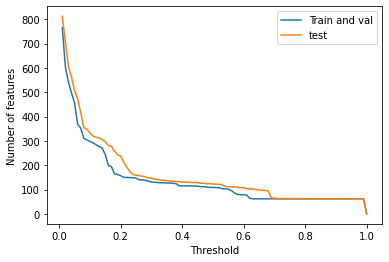

In [196]:
plt.plot(xs, y_miss_trainval, label='Train and val')
plt.plot(xs, y_miss_test, label='test')
plt.xlabel('Threshold')
plt.ylabel('Number of features')
plt.legend()

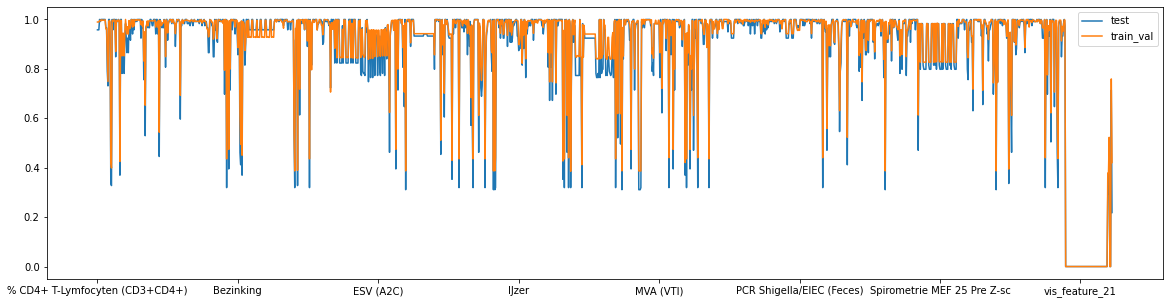

In [160]:
import matplotlib.pyplot as plt
(df[df.part == 'test'].isna() | (df[df.part == 'test'] == 'nan')).mean().plot(figsize=(20, 5), label='test')
(df[df.part.isin(['train', 'val'])].isna() | (df[df.part.isin(['train', 'val'])] == 'nan')).mean().plot(figsize=(20, 5), label='train_val')
plt.legend()

In [213]:
1- roc_auc_score(y_test, df.loc[(df.part == 'test') & ((y_test != 'nan') & (~y_test.isna())), df.columns.str.startswith('vis_')].mean(axis=1).clip(0, 4)/4)

0.753968253968254

In [212]:
y_test

patientprimarymrn  study
10010              st000    1.0
10012              st000    0.0
10017              st000    1.0
10025              st000    0.0
10028              st000    0.0
10032              st000    1.0
10033              st000    1.0
10044              st000    1.0
10047              st000    0.0
10049              st000    1.0
10059              st000    1.0
10062              st000    1.0
10070              st000    1.0
10071              st001    1.0
10072              st000    0.0
10081              st000    1.0
10098              st000    1.0
10101              st001    1.0
10103              st001    1.0
10107              st000    1.0
10109              st001    0.0
10113              st000    1.0
10123              st000    1.0
10128              st000    1.0
10134              st000    1.0
10137              st000    1.0
10143              st000    1.0
10147              st000    1.0
10151              st000    1.0
10156              st002    1.0
10157          

In [148]:
(df.loc[(df.part == 'test'), 'pcr'] == 'nan').sum() / len((df.loc[(df.part == 'test'), 'pcr'] == 'nan'))

0.42016806722689076

In [149]:
(df.loc[(df.part == 'val'), 'pcr'] == 'nan').sum() / len(df.loc[(df.part == 'val'), 'pcr'] == 'nan')

0.5575757575757576

In [165]:
search.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 0.9930531953964028,
 'max_features': 0.997291197779636}

In [34]:
df.loc[df.part == 'test', 'corads_pcr']

patientprimarymrn  study
10001              st000    Positief
10003              st000    Positief
10005              st000    Negatief
10008              st000    Positief
10009              st000         nan
                              ...   
10184              st000    Negatief
10185              st000    Negatief
10186              st000    Negatief
                   st001    Negatief
10188              st000    Positief
Name: corads_pcr, Length: 119, dtype: category
Categories (4, object): ['Negatief', 'Positief', 'nan', 'Missing']

In [137]:
from sklearn.metrics import roc_auc_score
y2 = df.loc[df.part == 'test', 'pcr']
not_nan = (y2 != 'nan') & ~y2.isna()
X_reduced_no_names = X_test[not_nan].copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y2[not_nan], sc.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.6222570532915361

In [101]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, ve.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.774294670846395

In [322]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, lgbm.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.780564263322884

In [317]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, lgbm.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.7570532915360502

In [319]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, stupid.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.7742946708463949

In [297]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, lgbm.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.7547021943573667

In [301]:
from sklearn.metrics import roc_auc_score
X_reduced_no_names = X_test.copy()
X_reduced_no_names.columns = np.arange(len(X_test.columns))
roc_auc_score(y_test, stupid.predict_proba(cat_to_num(X_reduced_no_names, impute=False))[:, 1])

0.7789968652037617

In [255]:
from sklearn.metrics import make_scorer
cross_validate(LGBMRegressor(n_jobs=-1), X_train_reduced_no_names, y_train, scoring=make_scorer(corads_roc_auc))

{'fit_time': array([0.9109993 , 0.90100217, 0.90000129, 0.94500089, 0.95399976]),
 'score_time': array([0.58799887, 0.75799751, 0.55499744, 0.58000112, 0.58299947]),
 'test_score': array([0.50988142, 0.48961353, 0.54414442, 0.56196581, 0.51908397])}

In [256]:
y_test.dtype

dtype('float64')

In [106]:
from typing import Dict, Union
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
def generate_pipeline_lr(X: pd.DataFrame, model_params: Dict[str, Union[str, bool, int, float]] = None, regression: bool = False):
    categorical_columns = list(X.select_dtypes(include=['category']).columns)
    numerical_columns = list(X.select_dtypes(exclude=['category']).columns)

    cateogrical_preprocessor = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='missing'),
        OrdinalEncoder(categories=[list(X[col].cat.categories) for col in categorical_columns])
    )
    numerical_preprocessor = SimpleImputer(strategy='mean')

    imputation = ColumnTransformer([
        ('categorical', cateogrical_preprocessor, categorical_columns),
        ('numerical', numerical_preprocessor, numerical_columns)
    ])

    params = model_params
    assert model_params is not None, 'Must supply model params for HyperOptConfig'

    clf = Pipeline([
        ('imputation', imputation),
        ('estimator', SVC(probability=True))
    ])

    return clf

In [107]:
lr_pipeline = generate_pipeline_lr(X, {}, False)

In [108]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['ABpos',
                                                                                               'Aneg',
                                                                                               'Apos',
                                                                                               'Bpos',
                                                                                               'Oneg',
            

In [109]:
roc_auc_score(y_test, lr_pipeline.predict_proba(X_test)[:, 1])

0.5477582846003898

In [71]:
trial = study.trials[0]

KeyboardInterrupt: 

In [61]:
model_params = {k: v for k, v in trial.params.items() if not k.startswith('use_col')}

In [62]:
model_params

{'boosting_type': 'gbdt',
 'n_estimators': 212,
 'learning_rate': 2.2682699240764637e-15,
 'max_depth': 16,
 'num_leaves': 146,
 'reg_alpha': 1.0386223784782622e-09,
 'reg_lambda': 1.115437568477484e-05,
 'subsample': 0.9850603606481702,
 'subsample_freq': 19,
 'min_child_samples': 29,
 'max_bin': 148,
 'extra_trees': False,
 'path_smooth': 1.030209349064192e-12,
 'colsample_bytree': 0.9146387434228567,
 'linear_tree': False}

In [63]:
to_drop = []
for col in X.columns:
    use_col = trial.params[f'use_col_{col}']
    if not use_col:
        to_drop.append(col)

X_reduced = X_test.drop(columns=to_drop)

In [70]:
to_drop

['% CD8+ T-Lymfocyten',
 '% T-lymfocyten',
 '3-Methoxytyramine',
 '5-HIAA/MMOL KREAT',
 '6-MMPR',
 '6-MMPR-R',
 '6-TGN-R',
 'A Dur',
 "A'",
 'ACTH',
 'AF',
 'ANCA fluorescentie',
 'ANTI-NMDA RECEPTOR',
 'APTT',
 'AR PGmax',
 'AR VC diam',
 'AV VTI',
 'AV Vmax',
 'AV Vmean',
 'Aa',
 'Aantal geplande transplantaties',
 'Aantal liter processed',
 'Abnormaal kernchromatine',
 'Absolute neutrofiele segmentkernigen',
 'Acetylsulfamethoxazol',
 'Adenovirus totaal Ig',
 'Aferese CD34 / KG',
 'Aferese CD34 / kg / zak na cryopreservatie',
 'Aferese CD34 totaal na cryopreservatie',
 'Aferese CD34/kg na cryopreservatie',
 'Afnameconditie',
 'Afwijk. lymfo suspect reactief',
 'Afwijkende lymfocyten suspect maligne',
 'Afwijkende lymfocyten suspect reactief',
 'Albumine Quotient',
 'Albumine kreatinine ratio',
 'Albumine nefelometrisch',
 'Albumine/kreatinine ratio',
 'Alcohol',
 'Aldosteron',
 'Alfa-1-antitrypsine klaring',
 'Alfa-1-microglobuline',
 'Alfa-2-globuline',
 'Alfa-Foetoproteine',
 'Alg

In [64]:
to_drop = []
for col in X.columns:
    use_col = trial.params[f'use_col_{col}']
    if not use_col:
        to_drop.append(col)

X_train_reduced = X_train.drop(columns=to_drop)

In [65]:
from typing import Dict, Union
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
def generate_pipeline(X: pd.DataFrame, model_params: Dict[str, Union[str, bool, int, float]] = None, regression: bool = False):
    categorical_columns = list(X.select_dtypes(include=['category']).columns)
    numerical_columns = list(X.select_dtypes(exclude=['category']).columns)

    cateogrical_preprocessor = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='missing'),
        OrdinalEncoder(categories=[list(X[col].cat.categories) for col in categorical_columns])
    )
    numerical_preprocessor = SimpleImputer(strategy='mean')

    imputation = ColumnTransformer([
        ('categorical', cateogrical_preprocessor, categorical_columns),
        ('numerical', numerical_preprocessor, numerical_columns)
    ])

    params = model_params
    assert model_params is not None, 'Must supply model params for HyperOptConfig'

    clf = Pipeline([
        ('imputation', imputation),
        ('estimator', LGBMRegressor(n_jobs=-1, **params) if regression else LGBMClassifier(n_jobs=-1, **params))
    ])

    return clf

In [66]:
from lightgbm.sklearn import LGBMRegressor, LGBMClassifier
reg = generate_pipeline(X_train_reduced, model_params, False)

In [67]:
reg.fit(X_train_reduced, y_train)

Pipeline(steps=[('imputation',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['ABpos',
                                                                                               'Aneg',
                                                                                               'Apos',
                                                                                               'Bpos',
                                                                                               'Oneg',
            

In [68]:
study.best_value

0.9766081871345029

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, reg.predict_proba(X_reduced)[:, 1])

0.8294346978557505

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test >= 3,  reg.predict(X_reduced)/4)

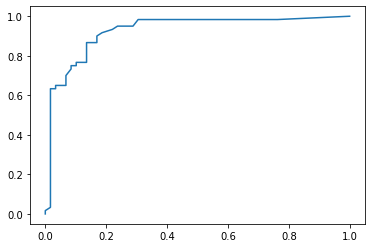

In [77]:
import matplotlib.pyplot as plt
plt.plot(fpr_grd_lm, tpr_grd_lm)

<AxesSubplot:>

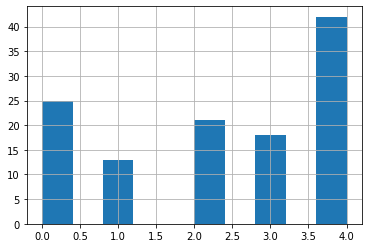

In [79]:
y_test.hist()

In [81]:
y_test.value_counts()

4.0    42
0.0    25
2.0    21
3.0    18
1.0    13
Name: corads, dtype: int64

<AxesSubplot:ylabel='Density'>

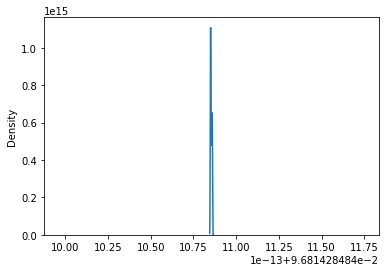

In [82]:
import seaborn as sns
sns.kdeplot(data=reg.predict(X_reduced)/4)

In [84]:
reg2 = LGBMRegressor(n_jobs=-1, boosting_type='dart')
X_train_reduced_no_names = X_train_reduced.copy()
X_train_reduced_no_names.columns = np.arange(len(X_train_reduced.columns))
reg2.fit(X_train_reduced_no_names, y_train)

LGBMRegressor(boosting_type='dart')

In [85]:
X_reduced_no_names = X_reduced.copy()
X_reduced_no_names.columns = np.arange(len(X_reduced.columns))

In [87]:
from sklearn.metrics import roc_auc_score
corads_roc_auc(y_test, reg2.predict(X_reduced_no_names))

0.9415254237288135

In [88]:
from sklearn.metrics import roc_curve

In [94]:
fpr_reg, tpr_reg, _ = roc_curve(y_test >= 3,  reg.predict(X_reduced)/4)
fpr_reg2, tpr_reg2, _ = roc_curve(y_test >= 3,  reg2.predict(X_reduced)/4)

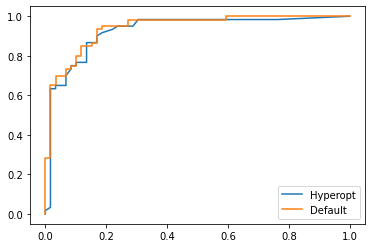

In [97]:
import matplotlib.pyplot as plt
plt.plot(fpr_reg, tpr_reg, label='Hyperopt')
plt.plot(fpr_reg2, tpr_reg2, label='Default')
plt.legend()

<AxesSubplot:ylabel='Density'>

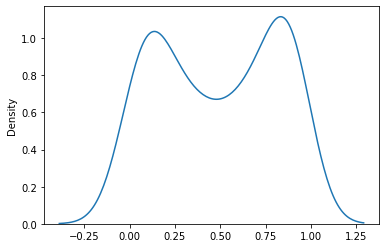

In [91]:
import seaborn as sns
sns.kdeplot(data=reg2.predict(X_reduced)/4)

In [99]:
roc_auc_score([1, 1, 0, 0], [0.5000001, 0.50000001, 0.49999999, 0.49999999])

1.0